<a href="https://colab.research.google.com/github/andrealvinoscy/TrabalhoFaculdadePython/blob/main/Trabalhopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: André Alvino dos Santos
RU: 5491035
---


Saving salarios.csv to salarios.csv
Cargo
Analista       4237.850
Estagiário     1525.250
Gerente       13067.010
Líder          8800.525
Name: Salario, dtype: float64


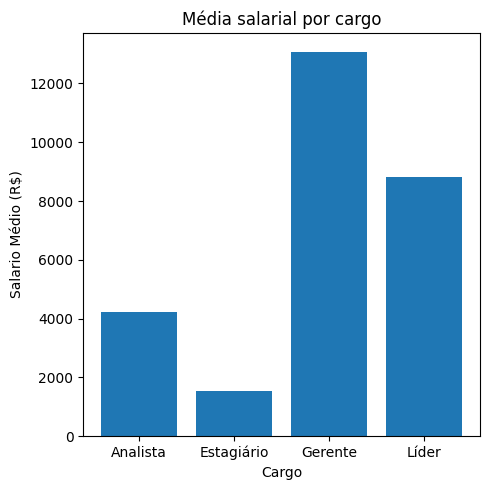

In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('salarios.csv', encoding = "ISO-8859-1")

media_cargo = df.groupby('Cargo')['Salario'].mean()

print(media_cargo)

mp.figure(figsize=(5,5))
mp.bar(media_cargo.index, media_cargo.values)
mp.title('Média salarial por cargo')
mp.xlabel('Cargo')
mp.ylabel('Salario Médio (R$)')
mp.tight_layout()
mp.show()


In [ ]:
import re
import json

texto = "Nome: Ana, Email: ana@email.com, Nome: João, Email: joao@email.com"
padrao = r"Nome:\s*([^,]+),\s*Email:\s*([^\s,]+)"
r = re.findall(padrao, texto)
print(r)

dados = [{"nome": nome.strip(), "email": email.strip()} for nome, email in r]

with open("saida.json", "w", encoding="utf-8") as f:
    json.dump(dados, f, ensure_ascii=False, indent=2)

print("salvando em .json:", dados)

[('Ana', 'ana@email.com'), ('João', 'joao@email.com')]
salvando em .json: [{'nome': 'Ana', 'email': 'ana@email.com'}, {'nome': 'João', 'email': 'joao@email.com'}]


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import sqlite3 as sq

df = pd.read_excel('loja.xlsx', sheet_name="CLIENTE")
print(df)
conectar = sq.connect('usuarios.db')
cursor = conectar.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS clientes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT,
    email TEXT,
    sexo TEXT
)
""")
df.to_sql("clientes", conectar, if_exists="replace", index=False)

todos = pd.read_sql_query("SELECT * FROM clientes", conectar)
print("TODOS OS CLIENTES:")
print(todos)

feminino = pd.read_sql_query("SELECT * FROM clientes WHERE sexo = 'f'", conectar)
print("\nCLIENTES FEMININO:")
print(feminino)

feminino.to_excel("clientes_feminino.xlsx", index=False)

conectar.close()


Saving loja.xlsx to loja (4).xlsx
   Idcliente       Nome Sobrenome Sexo                              Email
0          1   Deivison     Silva    m          deivisonsilva@hotmail.com
1          2     Shiryu  da Chuva    m  shiryu@cavaleirosdoszoodiacos.com
2          3   Carolina       Liz    f              carol_liz@hotmail.com
3          4      Drogo    Trones    m        drogogameoftrones@gmail.com
4          5   Malévola    Disney    f                malevola@disney.com
5          6  Guilherme  Patriota    m                guilherme@gmail.com
6          7     Marina    Santos    f                  marina@pop.com.br
7          8   Deivison   Andrade    m                 teste@teste.com.br
TODOS OS CLIENTES:
   Idcliente       Nome Sobrenome Sexo                              Email
0          1   Deivison     Silva    m          deivisonsilva@hotmail.com
1          2     Shiryu  da Chuva    m  shiryu@cavaleirosdoszoodiacos.com
2          3   Carolina       Liz    f              carol_l